In [16]:
#import libraries
import numpy as np #statistical 
import pandas as pd #data frame numbers . head/tail 

from scipy import stats  
import matplotlib.pyplot as plt 
from matplotlib.pyplot import pie, show
import seaborn as sns #visualisation graphs and plots 

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 

from sklearn.preprocessing import PolynomialFeatures



In [17]:
#import the data
day = pd.read_csv("day.csv") 

#make a copy
dd = day.copy()

In [18]:
#unify columns 
dd= dd.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'atemp':'feel_temp', 'hum':'humidity', 'cnt':'total_rides'})

In [19]:
dd.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
print(dd.shape)

(731, 16)


What do I want: 
based on INPUT weathersit 
how many OUTPUT total rides will i have each month

Questions:
will the answer be in hours? 

In [21]:
#drop columns: 
dd.drop(["instant", "date", "year", "season", "holiday", "weekday", "workingday", "temp", "feel_temp", "humidity", "windspeed", "casual", "registered"], axis="columns", inplace=True)

Polynomial regression

because month plotted is curved 

In [22]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   month        731 non-null    int64
 1   weathersit   731 non-null    int64
 2   total_rides  731 non-null    int64
dtypes: int64(3)
memory usage: 17.3 KB


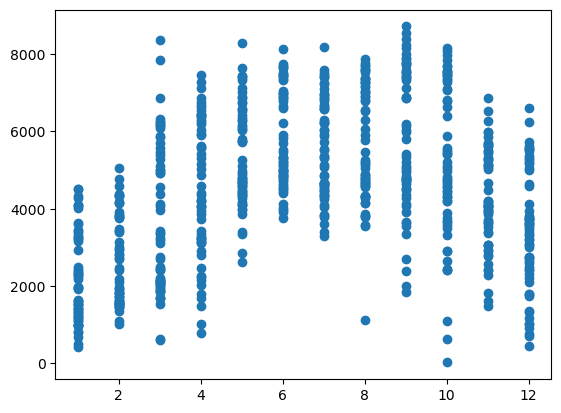

In [23]:
#plot month 
plt.scatter(dd['month'], dd['total_rides'])

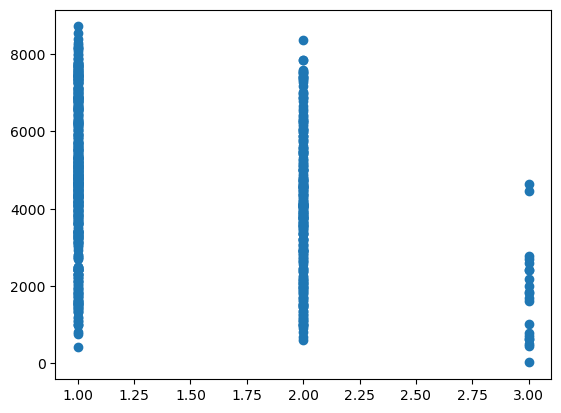

In [24]:
#plot weathersit 
plt.scatter(dd['weathersit'], dd['total_rides'])

In [25]:
#assign x and y 
#X = np.array(dd[['month', 'weathersit']])
#Y = np.array(dd['total_rides'])

In [41]:
#assign x and y without numpy array
X = dd[['month', 'weathersit']]
Y = dd['total_rides']

In [26]:
#do i not have to split my data? 

In [36]:
# model 
# bias = false --> intercept doesnt start at 0 
poly = PolynomialFeatures(degree=2, include_bias=False)

#in a polynomial regression we areusing the same information we have but editing it to work with it in a more complex way, in a more complex model

In [42]:
#add X squared to the feature set 
X_poly = poly.fit_transform(X)

In [29]:
#polynomial model is a linear regression model 
poly_reg_model = LinearRegression()

In [43]:
#fit my model to my features
poly_reg_model.fit(X_poly, Y)

LinearRegression()

In [ ]:
#maybe i need to add a reshape for x_vals
#X_vals = dd.reshape(-1, 1)
#linear regression reshape????????? 

In [ ]:
#the model is traine for polynomial features we need to also use those for prediction
X_vals_poly = poly.transform(X_vals)

In [32]:
#transforms our numpy array x from a 1D array to a 2D array 
#X_vals = poly.fit_transform(X.reshape(-1, 1))

#example said to do this, gave me an error. dont really understand it. model works without this so hey ho 

In [ ]:
#y values = taking the X_vals and using them to predict my y values 
Y_vals = poly_reg_model.predict(X_vals_poly)

In [ ]:
#try plotting 
plt.scatter(X, Y)
plt.plot(X_vals, Y_vals)

#we feed the model polynomial features, but we still plot a 2D graph 

everything from here on down is still copied from linear regression 

In [31]:
#predict y based on x 
#assign it to a y predict variable 
y_pred = model.predict(x_test)

#is this my Y True? 

NameError: name 'model' is not defined

In [ ]:
#test the accuracy 
model.score(x_test, y_test)

0.1719086607488831

In [ ]:
#MAE absolute 
# closer to 0 is most accurate
mean_absolute_error(y_test, y_pred)

#this asks for y true

1432.1485318141206

In [ ]:
#MSE squared error - for outliers 
#only used to get to RMSE 
# MSE can be too big to actualy evaluate 
#use either MAE or RMSE
# closer to 0 is accurate 

MSE = mean_squared_error(y_test, y_pred)

In [ ]:
RMSE = math.sqrt(MSE)
print("Root Mean Square Error")
print(RMSE)

Root Mean Square Error
1753.2819291559583


In [ ]:
# R2 
# 0-1
# the closest to 1 the better the model is 

r2_score(y_test, y_pred)

#cn be sensitive to outliers 
#for that you can use r squared adjusted 


0.1719086607488831

Presentation

show which model i used. with results.
show what i changed and why. 
    overfitting 
    graphs etc 
show next model. with results. 

total rides

then cold specify to apply to real world marketing 

specify for regular users

here we see: reduced bike usage with bad weather. but the same weather quality day in mai has more regular users than in january/february. 
so marketing goal would be incentives on good weather days in winter to encourage an increase in rides by regular users. 

